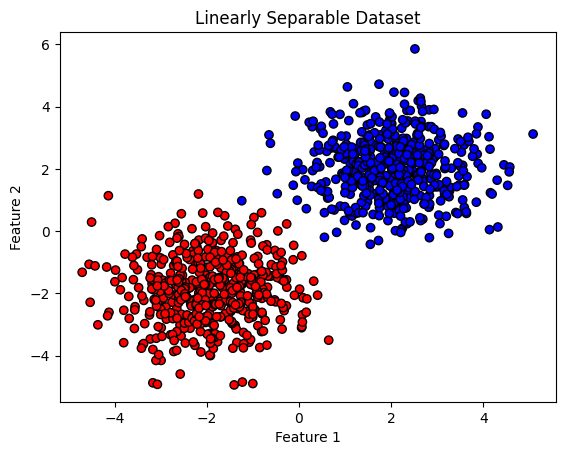

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_points = 1000
np.random.seed(42)

# Generate random points
class_1 = np.random.randn(num_points // 2, 2) + [2, 2]
class_2 = np.random.randn(num_points // 2, 2) + [-2, -2]

# Combine the points
data = np.vstack((class_1, class_2))
labels = np.hstack((np.zeros(num_points // 2), np.ones(num_points // 2)))

# Plot the dataset
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='bwr', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linearly Separable Dataset') 
plt.show()

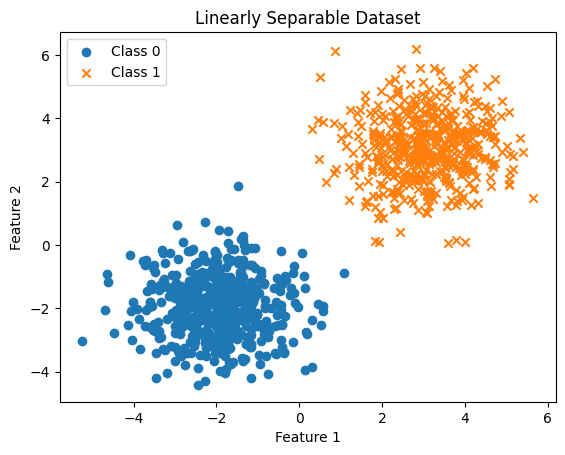

In [13]:
def generate_dataset(num_points, mean_class_a, variance_class_a, mean_class_b, variance_class_b):
    """
    Generates a linearly separable dataset by creating two concentric circles with given mean and variance
    
    """
    np.random.seed(42)
    # Class -1 points
    class_a_points = np.random.normal(loc=mean_class_a, scale=variance_class_a, size=(num_points // 2, 2))    
    # Class 1 points
    class_b_points = np.random.normal(loc=mean_class_b, scale=variance_class_b, size=(num_points // 2, 2))
    
    # Combine the points and labels
    X = np.vstack((class_a_points, class_b_points))
    y = np.concatenate((-1 * np.ones(num_points // 2), np.ones(num_points // 2)))

    # Shuffle the dataset
    shuffle_indices = np.random.permutation(num_points)
    X = X[shuffle_indices]
    y = y[shuffle_indices]
    
    return X, y


def plot_dataset(features, labels, title):
    """
    Plots the dataset created 
    """
    plt.scatter(features[labels == -1, 0], features[labels == -1, 1], marker='o', label='Class 0')
    plt.scatter(features[labels == 1, 0], features[labels == 1, 1], marker='x', label='Class 1')
    plt.title('Linearly Separable Dataset')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()



num_points = 1000
mean_class_a = [-2, -2]
variance_class_a = [1, 1]
mean_class_b = [3, 3]
variance_class_b = [1, 1]

features, labels = generate_dataset(num_points,mean_class_a,variance_class_a,mean_class_b,variance_class_b)

# Plot the original dataset
plot_dataset(features, labels, title='Original Dataset')

# Decision boundary before training

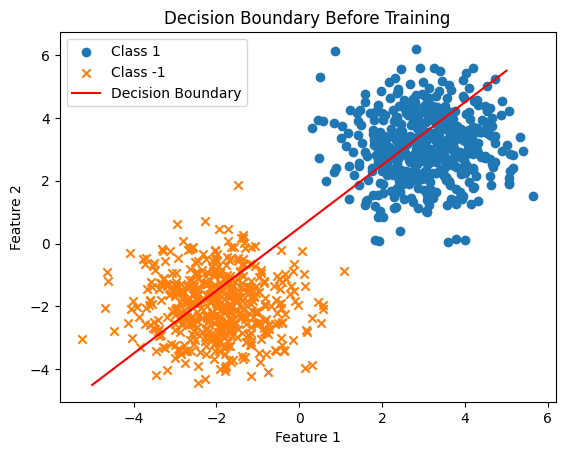

In [14]:
# Plot decision boundary and dataset
def plot_decision_boundary(features, labels, weights, bias, title):
    """
    Plots the decision boundary generated after training the perceptron learning algorithm
    """
    plt.scatter(features[labels == 1][:, 0], features[labels == 1][:, 1], label='Class 1', marker='o')
    plt.scatter(features[labels == -1][:, 0], features[labels == -1][:, 1], label='Class -1', marker='x')
    
    x_vals = np.linspace(-5, 5, 100)
    y_vals = (-weights[0] * x_vals - bias) / weights[1]
    plt.plot(x_vals, y_vals, '-r', label='Decision Boundary')
    
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

weights_initial = np.array([1.0, -1.0])
bias_initial = 0.5

# Plot decision boundary and dataset before training
plot_decision_boundary(features, labels, weights_initial, bias_initial, title='Decision Boundary Before Training')


In [ ]:
weights, bias,num_updates = perceptron_train(features, labels,weights_initial,bias_initial)

print("Number of iterations k = ",num_updates)
# Plot the dataset with the decision boundary
plot_decision_boundary(features, labels, weights, bias, title='Decision Boundary After Training')

# issues:
    - my data is the issue?
    - or the algorithm is the issue?
    - because my below line of code is behaving differently for the different execution , i am getting a different output everytime
    - how do i make the dataset noisy?

[-40.43868459  49.4027361 ]


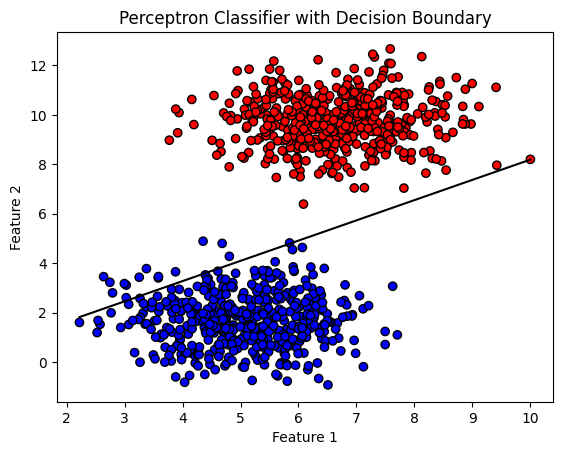

In [18]:
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np

class Perceptron:
    def __init__(self,iter):
        self.weights = None
        self.iter = iter
    
    def pla_train(self,X,y):
        n_samples , n_features = X.shape
        self.weights = np.zeros(n_features)
        # what shall be the convergence criteria?
        k = 0
        while k<self.iter:
            for i in range(n_samples):
                linear_output = (np.transpose(self.weights) @ X[i])*y[i]
                if linear_output <=0:
                    self.weights = self.weights+ y[i]*X[i]
            k+=1
    
    def pla_predict(self,X):
        linear_output = np.dot(X[i],self.weights)
        return linear_output


if __name__ == "__main__":

    X,y =datasets.make_blobs(n_samples=1000,n_features=2,centers=2,center_box=(0,10))
    y = np.where(y==0,-1,1)
    # print(X,y)
    # print(X[:,0],X[:,1])
    def visualize(X,y,msg):
        plt.scatter(X[:,0],X[:,1], c=y, cmap='bwr', edgecolors='k')
        plt.xlabel(f'Feature 1 {msg}')
        plt.ylabel(f'Feature 2 {msg}')
        plt.title(f'Linearly Separable Dataset {msg}')
        plt.show()
        
    perceptron = Perceptron(1000) # criteria to chose the hyperparameter
    perceptron.pla_train(X,y)
    print(perceptron.weights)
    # perceptron2 = Perceptron(1000) # criteria to chose the hyperparameter
    # perceptron2.pla_train(X,y)
    # print(perceptron2.weights)
    
    # perceptron3 = Perceptron(10) # criteria to chose the hyperparameter
    # perceptron3.pla_train(X,y)
    # print(perceptron3.weights)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')

    # Plot decision boundary
    x1 = np.linspace(min(X[:, 0]), max(X[:, 0]), 1000)
    x2 = -(perceptron.weights[0] * x1 ) / perceptron.weights[1]
    plt.plot(x1, x2, color='black')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Perceptron Classifier with Decision Boundary')
    plt.show()

[-1.41325851 -0.48580268]


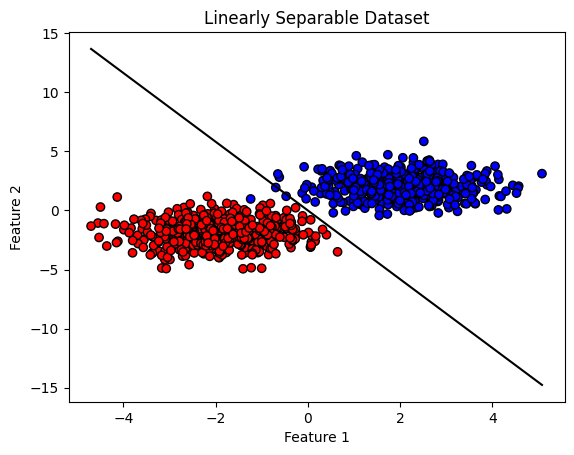

In [22]:
perceptron2 = Perceptron(10) # criteria to chose the hyperparameter
perceptron2.pla_train(data,labels)
print(perceptron2.weights)


# Plot decision boundary
x1 = np.linspace(min(data[:, 0]), max(data[:, 0]), 1000)
x2 = -(perceptron2.weights[0] * x1 ) / perceptron2.weights[1]
plt.plot(x1, x2, color='black')

plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='bwr', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linearly Separable Dataset') 
plt.show()

[-1.41325851 -0.48580268]


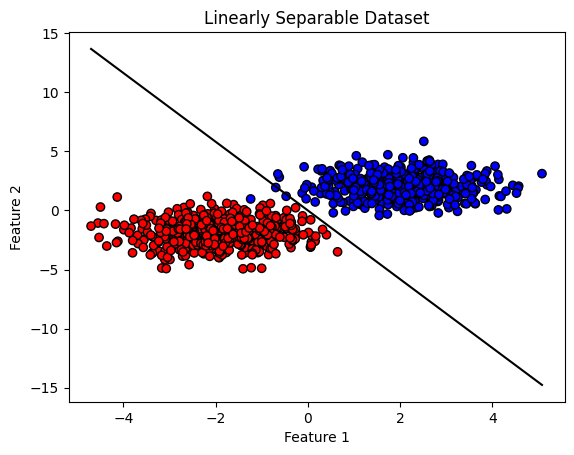

In [19]:
perceptron3 = Perceptron(100) # criteria to chose the hyperparameter
perceptron3.pla_train(data,labels)
print(perceptron3.weights)


# Plot decision boundary
x1 = np.linspace(min(data[:, 0]), max(data[:, 0]), 1000)
x2 = -(perceptron3.weights[0] * x1 ) / perceptron3.weights[1]
plt.plot(x1, x2, color='black')

plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='bwr', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linearly Separable Dataset') 
plt.show()

## Gradient descent algorithm
- this part is majorly about the gradient descent algo implemented for the part (a) with linearly separable dataset.
  
theta is w,b
- how do implement the backpropagation part, 
- best is to apply the rate of change formula. how this grad_w will be calculated?

eta=0.01
while max_iterations<1000:
 

- how do i create the dataset noisy?
- 

In [ ]:
import numpy as np

def sigmoid(X,theta):
    res = np.exp(-X.dot(theta))
    return 1/(1+res)

def gradient_descent(X,y):
    theta = np.random.randn(X.shape[1], 1)
    learning_rate=0.01
    n_iter=1000
    m = X.shape[0] # no.of samples
    for _ in range(n_iter):
        gradients = -1/m * X.T.dot(y-sigmoid(X,theta))
        theta = theta - learning_rate*gradients
    return theta


get_theta = gradient_descent(data,labels)
print(get_theta)



[[-0.01344436 -0.01344436 -0.01344436 ... -0.03663115 -0.03663115
  -0.03663115]
 [-0.00720899 -0.00720899 -0.00720899 ...  0.05642939  0.05642939
   0.05642939]]


In [ ]:
from sklearn.metrics import accuracy_score
# Make predictions
y_pred_prob = sigmoid(data, get_theta)
y_pred = (y_pred_prob >= 0.5).astype(int)

#y = (X.dot(get_theta) + np.random.randn(m, 1) > 0).astype(int)

# Evaluate the performance
accuracy = accuracy_score(labels, y_pred)
print(f'Trained parameters: {get_theta}')
print(f'Accuracy: {accuracy:.2f}')

ValueError: Classification metrics can't handle a mix of binary and multilabel-indicator targets